Evaluación final. Evaluación del desarrollo de mis competencias.

David Garza Carbajal-A0382607

College Football Team Stats Seasons 2013 to 2020
Team Statistics for each FBS level college football team.

Inside the data is the team statistics for all of the FBS level teams at the year of the college season, it includes offensive, defensive, turnover, redzone, special teams, first down, third down, and fourth down stats. There are around 145 differenc team statistics that can be used.

Link base de datos.
https://www.kaggle.com/jeffgallini/college-football-team-stats-2019

In [39]:
#Limpiar la base de datos.#

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

datab = pd.read_csv('Minitabeq1.csv')

In [10]:
datab.head(5)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,Def.Rank,Def.Plays,Yards.Allowed,Yards.Play.Allowed,Off.TDs.Allowed,Total.TDs.Allowed,Yards.Per.Game.Allowed
0,Air Force (Mountain West),6,3,3,73,373,2336,6.26,19,389.3,8,360,1820,5.06,11,12,303.3
1,Akron (MAC),6,1,5,121,360,1687,4.69,12,281.2,110,365,2759,7.56,31,34,459.8
2,Alabama (SEC),11,11,0,5,764,5983,7.83,68,543.9,33,767,3863,5.04,25,25,351.2
3,App State (Sun Belt),12,9,3,26,845,5424,6.42,49,452.0,18,798,3946,4.94,27,30,328.8
4,Arizona (Pac-12),5,0,5,86,373,1847,4.95,10,369.4,116,351,2365,6.74,25,26,473.0


In [11]:
datab.drop(['Off.Plays','Def.Plays','Yards.Per.Game.Allowed','Off.Yards','Off.Yards.Play','Def.Plays','Yards.Allowed','Off.TDs.Allowed'],
           axis=1,
           inplace=True)

In [13]:
datab.rename(columns={'Games':'G','Win':'W','Loss':'L','Off.TDs':'offtd','Off.Yards.per.Game':'offyg','Yards.Per.Game.Allowed':'ypga','Off.Rank':'OR','Def.Rank':'DR','Yards.Play.Allowed':'YPA','Total.TDs.Allowed':'TTDA'},
             inplace=True)

In [14]:
datab.columns

Index(['Team', 'G', 'W', 'L', 'OR', 'offtd', 'offyg', 'DR', 'YPA', 'TTDA'], dtype='object')

In [15]:
datab.head(5)

,Team,G,W,L,OR,offtd,offyg,DR,YPA,TTDA
0,Air Force (Mountain West),6,3,3,73,19,389.3,8,5.06,12
1,Akron (MAC),6,1,5,121,12,281.2,110,7.56,34
2,Alabama (SEC),11,11,0,5,68,543.9,33,5.04,25
3,App State (Sun Belt),12,9,3,26,49,452.0,18,4.94,30
4,Arizona (Pac-12),5,0,5,86,10,369.4,116,6.74,26


In [17]:
datab.describe()

,G,W,L,OR,offtd,offyg,DR,YPA,TTDA
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,8.377953,4.314961,4.062992,63.976378,29.314961,399.435433,63.984252,5.725906,29.944882
std,2.350039,2.704202,2.329071,36.791878,13.060118,69.152887,36.801049,0.692604,11.408231
min,3.000000,0.000000,0.000000,1.000000,1.000000,187.500000,1.000000,4.340000,6.000000
25%,6.000000,2.000000,2.000000,32.500000,20.500000,356.600000,32.500000,5.275000,21.000000
50%,9.000000,4.000000,4.000000,64.000000,27.000000,393.700000,64.000000,5.660000,29.000000
75%,10.000000,6.000000,6.000000,95.500000,36.500000,438.950000,95.500000,6.190000,38.000000
max,13.000000,11.000000,10.000000,127.000000,68.000000,606.500000,127.000000,7.560000,58.000000


¿Qué tanto afectan las variables en las victorias de los equipos?

In [40]:
#Correlaciones#

In [18]:
regresion = sm.OLS.from_formula('W ~ OR + offtd + offyg + DR + YPA + TTDA',data=datab)
resultado = regresion.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     119.4
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           3.49e-48
Time:                        08:36:51   Log-Likelihood:                -182.73
No. Observations:                 127   AIC:                             379.5
Df Residuals:                     120   BIC:                             399.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4259      2.699      3.864      0.000       5.083      15.769
OR            -0.0251      0.009     -2.726      0.007      -0.043      -0.007
offtd          0.1861      0.015     12.354      0.000       0.156       0.216
offyg         -0.0174      0.005     -3.522      0.001      -0.027      -0.008
DR            -0.0186      0.006     -3.181      0.002      -0.030      -0.007
YPA           -0.0527      0.277     -0.190      0.850      -0.602       0.496
TTDA          -0.0512      0.015     -3.388      0.001      -0.081      -0.021
==============================================================================
Omnibus:                        0.482   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.786   Jarque-Bera (JB):                0.622
Skew:                           0.121   Prob(JB):                        0.733
Kurtosis:                       2.757   Cond. No.                     1.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

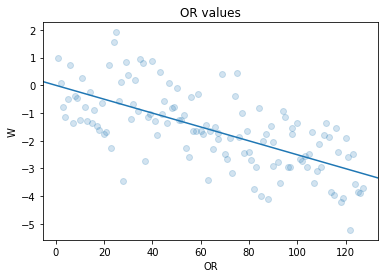

In [33]:
from statsmodels.graphics.regressionplots import plot_ccpr

plot1 = plt.axes()
plot_ccpr(resultado,"OR", plot1)
_ = plot1.lines[0].set_alpha(0.2)
_ = plot1.set_ylabel("W")
_ = plot1.set_title('OR values')

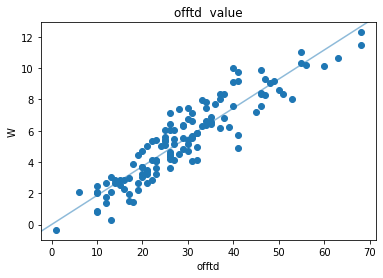

In [32]:
from statsmodels.graphics.regressionplots import plot_ccpr

plot1 = plt.axes()
plot_ccpr(resultado,"offtd", plot1)
_ = plot1.lines[1].set_alpha(0.5)
_ = plot1.set_ylabel("W")
_ = plot1.set_title('offtd  value')

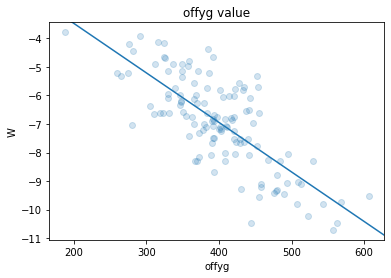

In [31]:
from statsmodels.graphics.regressionplots import plot_ccpr

plot1 = plt.axes()
plot_ccpr(resultado,"offyg", plot1)
_ = plot1.lines[0].set_alpha(0.2)
_ = plot1.set_ylabel("W")
_ = plot1.set_title('offyg value')

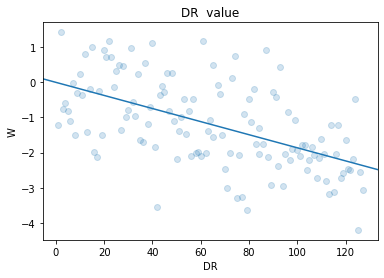

In [30]:
from statsmodels.graphics.regressionplots import plot_ccpr

plot1 = plt.axes()
plot_ccpr(resultado,"DR", plot1)
_ = plot1.lines[0].set_alpha(0.2)
_ = plot1.set_ylabel("W")
_ = plot1.set_title('DR  value')

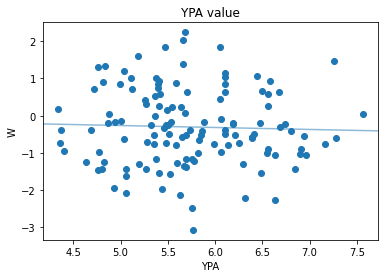

In [29]:
from statsmodels.graphics.regressionplots import plot_ccpr

plot1 = plt.axes()
plot_ccpr(resultado,"YPA", plot1)
_ = plot1.lines[1].set_alpha(0.5)
_ = plot1.set_ylabel("W")
_ = plot1.set_title('YPA value')

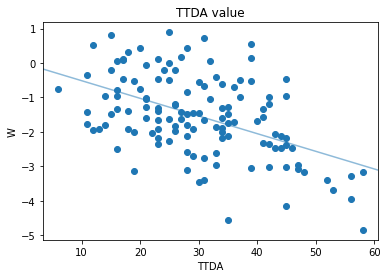

In [28]:
from statsmodels.graphics.regressionplots import plot_ccpr

plot1 = plt.axes()
plot_ccpr(resultado,"TTDA", plot1)
_ = plot1.lines[1].set_alpha(0.5)
_ = plot1.set_ylabel("W")
_ = plot1.set_title('TTDA value')

In [ ]:
#Victorias Totales#

In [ ]:
#BoxPlot#

In [34]:
datab.head(10)

,Team,G,W,L,OR,offtd,offyg,DR,YPA,TTDA
0,Air Force (Mountain West),6,3,3,73,19,389.3,8,5.06,12
1,Akron (MAC),6,1,5,121,12,281.2,110,7.56,34
2,Alabama (SEC),11,11,0,5,68,543.9,33,5.04,25
3,App State (Sun Belt),12,9,3,26,49,452.0,18,4.94,30
4,Arizona (Pac-12),5,0,5,86,10,369.4,116,6.74,26
5,Arizona St. (Pac-12),4,2,2,20,21,458.5,89,5.41,13
6,Arkansas (SEC),10,3,7,67,31,391.5,105,5.65,43
7,Arkansas St. (Sun Belt),11,4,7,13,46,489.7,115,6.30,53
8,Army West Point (FBS Independent),11,9,2,112,37,324.9,2,5.04,20
9,Auburn (SEC),10,6,4,75,26,385.0,61,5.66,31


In [37]:
datab_exper = datab.groupby('G', 
                           axis=0).mean()

print(type(datab.groupby('G', 
                      axis=0
                     )))

datab_exper.sort_values(['W'],
                       ascending=False,
                       axis=0,
                       inplace=True
                       )

datab_exper.head(15)

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,W,L,OR,offtd,offyg,DR,YPA,TTDA
G,,,,,,,,
13,8.000000,5.000000,84.000000,38.000000,371.200000,15.000000,5.110000,33.000000
12,7.000000,5.000000,45.250000,52.750000,434.425000,58.250000,5.422500,39.000000
11,6.666667,4.333333,51.190476,41.619048,422.400000,56.333333,5.576190,35.809524
10,4.961538,5.038462,63.423077,34.192308,401.596154,71.384615,5.808846,37.884615
9,4.300000,4.700000,64.250000,30.500000,396.820000,63.400000,5.669500,33.450000
8,4.111111,3.888889,77.222222,24.000000,378.455556,49.222222,5.360000,24.777778
7,3.909091,3.090909,61.818182,25.090909,401.036364,64.727273,5.824545,25.363636
6,2.684211,3.315789,63.578947,21.105263,399.752632,68.210526,5.921579,22.631579
3,2.000000,1.000000,91.000000,11.000000,364.000000,54.500000,5.770000,8.500000


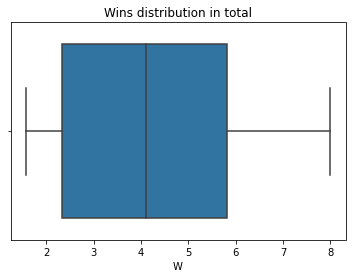

In [38]:
sns.boxplot(x = datab_exper["W"]).set_title("Wins distribution in total")
plt.show()